In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define dataset paths
train_dir = r'C:\Users\sai ganesh\Downloads\Chrome Downloads\archive\Split_smol\train'  # Path to training folder
val_dir = r'C:\Users\sai ganesh\Downloads\Chrome Downloads\archive\Split_smol\val'  # Path to validation folder

# Image parameters
img_height, img_width = 150, 150  # Resize images to 150x150
batch_size = 32

# Data augmentation and preprocessing for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Preprocessing for validation (no augmentation)
val_datagen = ImageDataGenerator(rescale=1.0/255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # For multi-class classification
)

# Load validation data
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Add more CNN layers to the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu'),  # Added layer
    MaxPooling2D(pool_size=(2, 2)),          # Added layer
    Conv2D(512, (3, 3), activation='relu'),  # Added layer
    MaxPooling2D(pool_size=(2, 2)),          # Added layer
    Flatten(),
    Dense(256, activation='relu'),           # Increased dense layer size
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')           # 9 classes
])


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Save the model
model.save('skin_disease_model.h5')

# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Found 696 images belonging to 9 classes.
Found 180 images belonging to 9 classes.


c:\Users\sai ganesh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\sai ganesh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 632ms/step - accuracy: 0.1426 - loss: 2.2015 - val_accuracy: 0.1167 - val_loss: 2.1964
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 558ms/step - accuracy: 0.1200 - loss: 2.1939 - val_accuracy: 0.1889 - val_loss: 2.1817
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 574ms/step - accuracy: 0.1777 - loss: 2.1568 - val_accuracy: 0.1944 - val_loss: 2.0218
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 578ms/step - accuracy: 0.1985 - loss: 2.0637 - val_accuracy: 0.2333 - val_loss: 2.0228
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 558ms/step - accuracy: 0.1825 - loss: 2.0602 - val_accuracy: 0.2389 - val_loss: 1.9007
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 556ms/step - accuracy: 0.2481 - loss: 1.9365 - val_accuracy: 0.2833 - val_loss: 1.7627
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.2732 - loss: 1.8747 - val_accuracy: 0.3167 - val_loss: 1.8220
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 126s 6s/step - accuracy: 0.2389 - loss: 1.8241 - val_accuracy:

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.3828 - loss: 1.4074
Validation Accuracy: 38.33%


Text(0.5, 1.0, 'model accuracy')

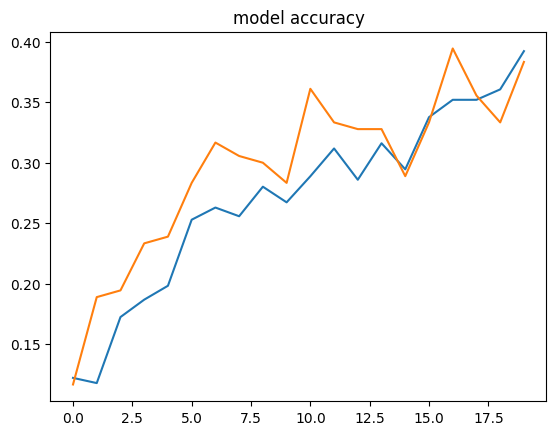

In [12]:
# Plotting the training history (optional)
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
loaded_model = load_model('skin_disease_model.h5')

# Load and preprocess the image
img_path = r'C:\Users\sai ganesh\Downloads\Chrome Downloads\archive\Split_smol\train\Squamous cell carcinoma\ISIC_0024539.jpg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize pixel values

# Predict the class
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Predicted class: [4]


In [ ]:
#give me code to develop a machine learning model using pretrained models suitable for the given dataset
#using transfer learning with VGG16model and fine-tuning it on the given dataset
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
# Load the VGG16 model without the top layer (include_top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model layers to retain pre-trained weights
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(9, activation='softmax')(x)  # 9 classes in the dataset

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Save the model
model.save('vgg16_skin_disease_model.h5')

# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

# Load the VGG16 model without the top layer (include_top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model layers to retain pre-trained weights
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(9, activation='softmax')(x)  # 9 classes in the dataset

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(patience=5, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(patience=3, min_lr=0.00001)

# Train the model with early stopping and learning rate reduction
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Save the model
model.save('vgg16_skin_disease_model.h5')

# Plot the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import classification_report, confusion_matrix

# Load the VGG16 model without the top layer (include_top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model layers to retain pre-trained weights
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(9, activation='softmax')(x)  # 9 classes in the dataset

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall(), AUC()])

# Define early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(patience=5, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(patience=3, min_lr=0.00001)

# Train the model with early stopping and learning rate reduction
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Save the model
model.save('vgg16_skin_disease_model.h5')

# Evaluate the model
val_loss, val_accuracy, val_precision, val_recall, val_auc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation Precision: {val_precision * 100:.2f}%")
print(f"Validation Recall: {val_recall * 100:.2f}%")
print(f"Validation AUC: {val_auc * 100:.2f}%")

# Print classification report and confusion matrix
y_pred = model.predict(val_generator)
y_pred_class = y_pred.argmax(-1)
print(classification_report(val_generator.classes, y_pred_class))
print(confusion_matrix(val_generator.classes, y_pred_class))

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.1128 - loss: 2.4250 - val_accuracy: 0.1111 - val_loss: 2.1974
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 139s 6s/step - accuracy: 0.1526 - loss: 2.3154 - val_accuracy: 0.1389 - val_loss: 2.1711
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1117 - loss: 2.3273

In [2]:
# Install kagglehub package
%pip install kagglehub

import kagglehub

# Download latest version
path = kagglehub.dataset_download("ismailpromus/skin-diseases-image-dataset")

print("Path to dataset files:", path)

   ---------------------------------------- 0.0/63.4 kB ? eta -:--:--
   ------------------- -------------------- 30.7/63.4 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 63.4/63.4 kB 681.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


100%|██████████| 5.19G/5.19G [27:13<00:00, 3.41MB/s]  


Extracting files...
Path to dataset files: C:\Users\sai ganesh\.cache\kagglehub\datasets\ismailpromus\skin-diseases-image-dataset\versions\1


In [ ]:


!pip install split_folders

import matplotlib.pyplot as plt
import matplotlib.image as mping
import random
import splitfolders 
import os
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
os.makedirs('output')
os.makedirs('output/train')
os.makedirs('output/val')
os.makedirs('output/test')

loc = "/kaggle/input/skin-diseases-image-dataset/IMG_CLASSES"

splitfolders.ratio(loc,output ="output",ratio = (0.8,0.1,0.1))

In [ ]:
def random_image(val_dir,val_class):
    folder = val_dir +val_class
    random_image = random.sample(os.listdir(folder),1)
    img = mping.imread(folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(val_class)
    return img

In [ ]:
fig = plt.figure(figsize=(10, 7))
#Add an Axes to the figure as part of a subplot arrangement(Three integers (nrows, ncols, index).)
fig.add_subplot(2,2,1)
img_1 = random_image(val_dir = "./output/val/",val_class = "2. Melanoma 15.75k")
fig.add_subplot(2,2,2)
img_2 = random_image(val_dir = "./output/val/",val_class = "4. Basal Cell Carcinoma (BCC) 3323")
fig.add_subplot(2,2,3)
img_3 = random_image(val_dir = "./output/val/",val_class = "5. Melanocytic Nevi (NV) - 7970")
fig.add_subplot(2,2,4)
img4 = random_image(val_dir = "./output/val/",val_class = "1. Eczema 1677")